# Introduction to Clustering
  
A Summary of lecture "Cluster Analysis in Python", via datacamp
  
## Unsupervised learning: basics
  
What is unsupervised learning?  
- A group of machine learning algorithm that find patterns in data
- Data for algorithms has not been labeled, classified or characterized
- The objective of the algorithm is to interpret any structure in the data
- Common unsupervised learning algorithms : Clustering, neural network, anomaly detection
  
What is clustering?  
- The process of grouping items with similar characteristics
- Items in groups similar to each other than in other groups
- Example: distance between points on a 2D plane
  
**Everyday example: Google news**  
While browsing through Google News, have you wondered what goes behind grouping news items together? How does the algorithm decide which articles are similar? It is the result of an unsupervised learning algorithm. It scans through the text of each article and based on frequently occurring terms, groups articles together.  
  
**Labeled and unlabeled data**  
Before we define unsupervised learning, let us try to understand the terms: labeled and unlabeled data. Imagine you have a list of points with X and Y coordinates. If only the coordinates of the points are available and there is no other characteristic available to distinguish the data points, it is called unlabeled data. At the same time, if we associate each data point with a group beforehand, say normal and danger zones, we call it labeled data.  
  
**What is unsupervised learning?**  
What is unsupervised learning? It is an umbrella term for a group of machine learning algorithms that are used to find patterns. The data that is used in these algorithms is not labeled, classified or characterized prior to running the algorithm. The algorithm is run, therefore, to find and explain inherent structures within the data. Common unsupervised learning algorithms are clustering, anomaly detections, and neural networks. Clustering is used to group similar data points together.  
  
**What is clustering?**  
Let us now move on to a specific class of unsupervised learning algorithms. Clustering is the process of grouping items with similar characteristics. The groups so formed are such that items in a single group are closer to each other in terms of some characteristics as compared to items in other clusters. Clustering falls under the group of unsupervised learning algorithms as the data is not labeled, grouped or characterized beforehand. A simple example to demonstrate clustering would be to group points on a 2D plane based on their distance.  
  
---
  
**Which of the following examples can be solved with unsupervised learning?**  
Possible Answers:  

[ ] A list of tweets to be classified based on their sentiment, the data has tweets associated with a positive or negative sentiment.

[ ] A spam recognition system that marks incoming emails as spam, the data has emails marked as spam and not spam.

[x] Segmentation of learners at DataCamp based on courses they complete. The training data has no labels.
  
*That is correct! As the training data has no labels, an unsupervised algorithm needs to be used to understand patterns in the data.*


### Pokémon sightings  
  
There have been reports of sightings of rare, legendary Pokémon. You have been asked to investigate! Plot the coordinates of sightings to find out where the Pokémon might be.  

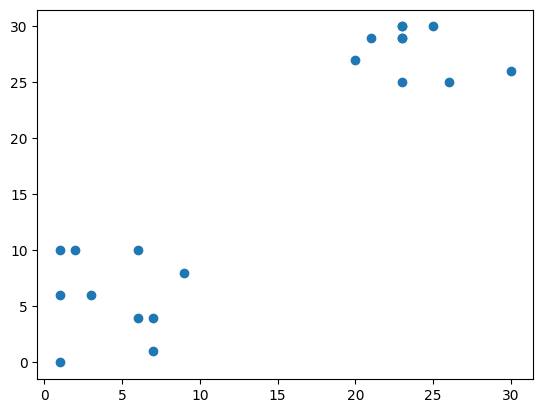

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Coordinates
x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]

# Create a scatter plot
plt.scatter(x, y)

That is correct! Notice the areas where the sightings are dense. This indicates that there is not one, but two legendary Pokémon out there!

## Basics of cluster analysis
  
**What is a cluster?**  
- A group of items with similar characteristics
- Google News: articles where similar words and word associations appear together
- Customer Segments
  
**Clustering Algorithms**
- Hierarchical Clustering
- K-means Clustering
- Other clustering algorithms: DBSCAN, Gaussian Methods
   

### Pokémon sightings: hierarchical clustering  
  
We are going to continue the investigation into the sightings of legendary Pokémon from the previous exercise. Remember that in the scatter plot of the previous exercise, you identified two areas where Pokémon sightings were dense. This means that the points seem to separate into two clusters. In this exercise, you will form two clusters of the sightings using hierarchical clustering. 

In [2]:
# Convert to a dataframe
df = pd.DataFrame({
    'x': x,
    'y': y
})


<Axes: xlabel='x', ylabel='y'>

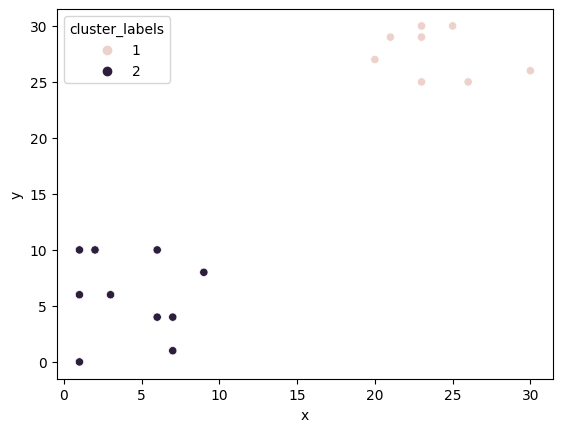

In [3]:
from scipy.cluster.hierarchy import linkage, fcluster


# Use the linkage() to compute distance
Z = linkage(df, 'ward')  # Ward variance minimization algorithm, computes distance between intermediate clusters

# Generate cluster labels
df['cluster_labels'] = fcluster(Z, 2, criterion= 'maxclust')

# Plot the points with seaborn
sns.scatterplot(x= 'x', y= 'y', hue='cluster_labels', data= df)

### Pokémon sightings: k-means clustering
  
We are going to continue the investigation into the sightings of legendary Pokémon from the previous exercise. Just like the previous exercise, we will use the same example of Pokémon sightings. In this exercise, you will form clusters of the sightings using k-means clustering.

In [4]:
df = df.astype('float')

<Axes: xlabel='x', ylabel='y'>

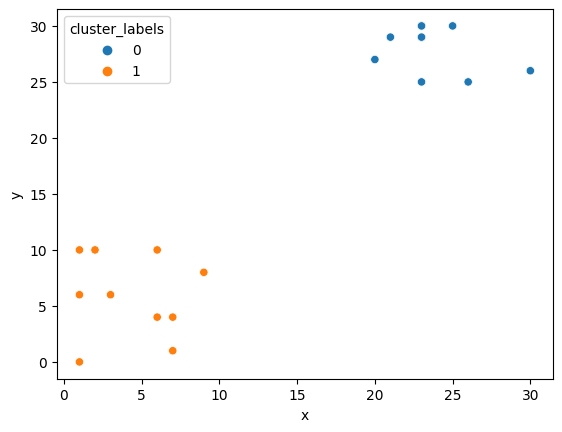

In [5]:
from scipy.cluster.vq import kmeans, vq


# Compute cluster centers
centroids, _ = kmeans(df, 2)

# Assign cluster labels
df['cluster_labels'], _ = vq(df, centroids)

# Plot the points with seaborn
sns.scatterplot(x= 'x', y= 'y', hue= 'cluster_labels', data= df)

Notice that in this case, the results of both types of clustering are similar. We will look at distinctly different results later.

## Data preparation for cluster analysis
  
**Why do we need to prepare data for clustering?**  
- Variables have incomparable units (product dimentions in cm, price in $)
- Variables with same units have vastly different scales and variances (expendures on travel, gross profit)
- Data in raw form may lead to bias in clustering
- Clusters may be heavily dependent on one variable
- Solution: normalization of individual variables
  
**Normalization of data**  
Normalization: process of rescaling data to a standard deviation of 1.  
Formula = `x_new = x/std_dev(x)`

### Normalize basic list data
  
Now that you are aware of normalization, let us try to normalize some data. goals_for is a list of goals scored by a football team in their last ten matches. Let us standardize the data using the `whiten()` function.

In [6]:
from scipy.cluster.vq import whiten


# Create list
goals_for = [4, 3, 2, 3, 1, 1, 2, 0, 1, 4]

# Use the whiten() function to standardize the data
scaled_data = whiten(goals_for)

# Display
print(scaled_data)

[3.07692308 2.30769231 1.53846154 2.30769231 0.76923077 0.76923077
 1.53846154 0.         0.76923077 3.07692308]


### Visualize normalized data
  
After normalizing your data, you can compare the scaled data to the original data to see the difference.

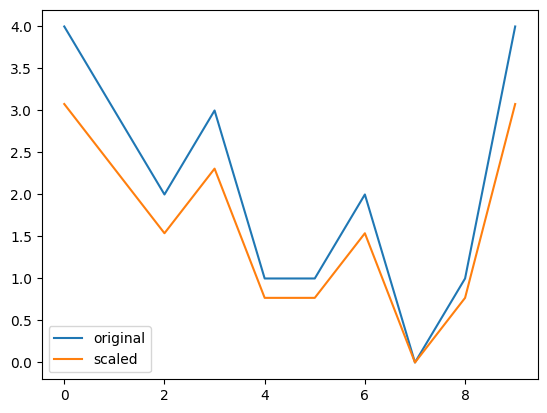

In [7]:
# Plotting the diffrence between the original and scaled data sets
plt.plot(goals_for, label= 'original')
plt.plot(scaled_data, label= 'scaled')
plt.legend()
# plt.savefig('../images/scaled_data.png')


### Normalization of small numbers
  
In earlier examples, you have normalization of whole numbers. In this exercise, you will look at the treatment of fractional numbers - the change of interest rates in the country of Bangalla over the years.

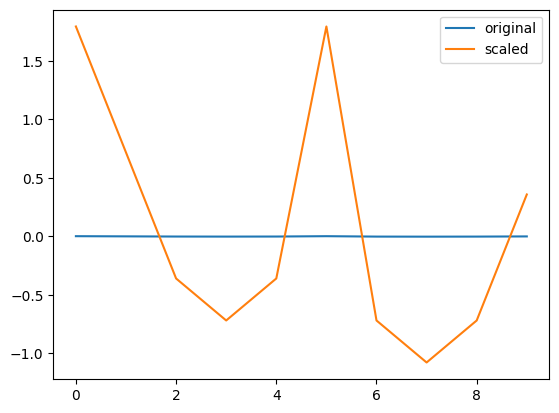

In [8]:
# Prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

# Use the whiten() function to standardize the data
scaled_data = whiten(rate_cuts)

# Display
plt.plot(rate_cuts, label= 'original')
plt.plot(scaled_data, label= 'scaled')
plt.legend()

### FIFA 18: Normalize data
  
FIFA 18 is a football video game that was released in 2017 for PC and consoles. The dataset that you are about to work on contains data on the 1000 top individual players in the game. You will explore various features of the data as we move ahead in the course. In this exercise, you will work with two columns, eur_wage, the wage of a player in Euros and eur_value, their current transfer market value.

In [9]:
# Load the dataset
fifa = pd.read_csv('../_datasets/fifa_18_sample_data.csv')
print(fifa.columns)

Index(['ID', 'name', 'full_name', 'club', 'club_logo', 'special', 'age',
       'league', 'birth_date', 'height_cm',
       ...
       'prefers_cb', 'prefers_lb', 'prefers_lwb', 'prefers_ls', 'prefers_lf',
       'prefers_lam', 'prefers_lcm', 'prefers_ldm', 'prefers_lcb',
       'prefers_gk'],
      dtype='object', length=185)


       scaled_wage  scaled_value
count  1000.000000   1000.000000
mean      1.119812      1.306272
std       1.000500      1.000500
min       0.000000      0.000000
25%       0.467717      0.730412
50%       0.854794      1.022576
75%       1.407184      1.542995
max       9.112425      8.984064


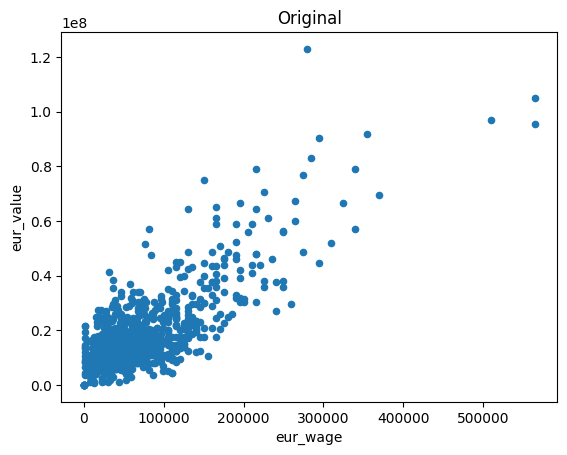

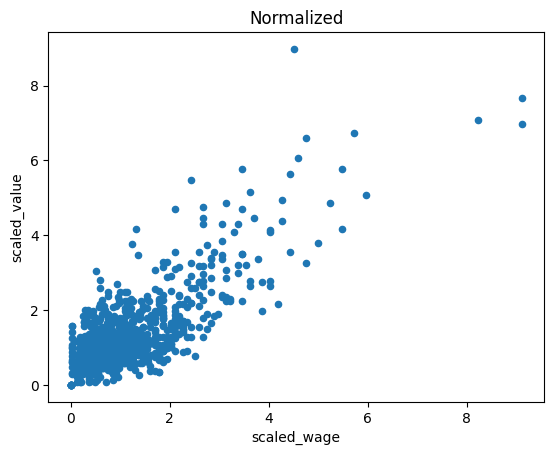

In [10]:
# Scale wage and value
fifa['scaled_wage'] = whiten(fifa['eur_wage'])
fifa['scaled_value'] = whiten(fifa['eur_value'])

# Plot
fifa.plot(x= 'eur_wage', y= 'eur_value', kind= 'scatter', title='Original')
fifa.plot(x= 'scaled_wage', y= 'scaled_value', kind= 'scatter', title= 'Normalized')

# Check mean and standard deviation of scaled values
print(fifa[['scaled_wage', 'scaled_value']].describe())